In [1]:
# 필요한 라이브러리 호출
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# 데이터 불러오기
data = pd.read_csv('Mall_Customers.csv')
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [3]:
# 데이터 전처리
# CustomerID는 순서일 뿐이므로 삭제
data = data.drop(columns=['CustomerID'])
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB
None


In [4]:
# 주요 특성 (Annual Income, Spending Score)으로 이루어진 데이터 추출
features = data[['Annual Income (k$)', 'Spending Score (1-100)']]
print(features.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Annual Income (k$)      200 non-null    int64
 1   Spending Score (1-100)  200 non-null    int64
dtypes: int64(2)
memory usage: 3.3 KB
None


In [5]:
# 데이터 표준화할 스케일러 생성 및 스케일링
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [6]:
# 훈련용 데이터와 테스트 데이터로 분리
x_train, x_test = train_test_split(scaled_features, test_size=0.2, random_state=42)

In [7]:
print(type(x_train))

<class 'numpy.ndarray'>


In [8]:
print(x_train)

[[-0.25039146 -0.3183368 ]
 [ 2.49780745  0.92395314]
 [-0.89927175 -0.93948177]
 [-1.24279661 -1.4053405 ]
 [ 0.32214998  0.30280817]
 [ 2.26879087  1.11806095]
 [-1.20462718  1.42863343]
 [-1.43364376  1.8556706 ]
 [ 0.58933599  1.42863343]
 [-0.13588317  0.30280817]
 [ 0.16947227 -0.08540743]
 [ 1.00919971  1.62274124]
 [-1.66266033  1.00159627]
 [ 0.39848884 -0.59008772]
 [ 0.16947227  0.34162973]
 [-0.40306917  0.22516505]
 [ 0.55116656 -1.75473454]
 [ 0.01679455 -0.3183368 ]
 [ 1.00919971 -1.56062674]
 [-0.02137488 -0.12422899]
 [ 1.00919971  0.49691598]
 [-0.02137488 -0.00776431]
 [-1.16645776  0.88513158]
 [-1.54815205 -1.36651894]
 [-1.05194947  1.19570407]
 [ 0.24581112  0.26398661]
 [-0.82293289 -0.55126616]
 [ 1.61991057  1.35099031]
 [-0.05954431  0.18634349]
 [ 0.4748277  -1.67709142]
 [-0.70842461  0.38045129]
 [ 0.39848884  1.73920592]
 [ 0.78018313 -1.75473454]
 [-0.86110232  1.62274124]
 [ 0.24581112 -0.27951524]
 [ 0.13130284 -0.16305055]
 [-1.24279661 -0.7065524 ]
 

In [9]:
print(len(x_train))

160


In [10]:
print(len(x_test))

40


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 지정된 파일을 찾을 수 없습니다
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\user\AppData\

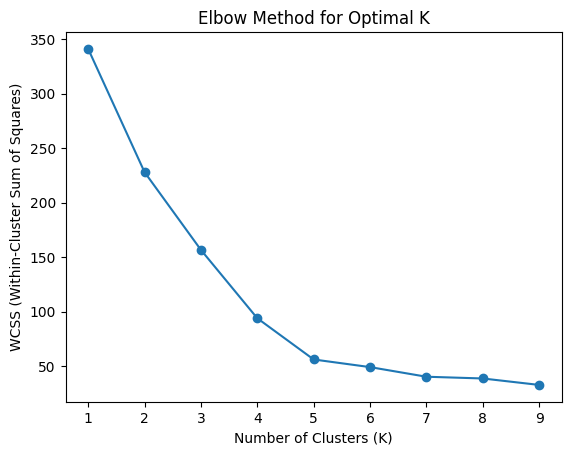

In [11]:
# 엘보우 방법을 통해 관성값 계산 후 최적의 k값 찾기
wcss = []
K_range = range(1, 10)
for k in K_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42)
    kmeans_temp.fit(x_train)
    wcss.append(kmeans_temp.inertia_)

# 엘보우 그래프 그리기
plt.plot(K_range, wcss, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.show()

In [12]:
# 최적의 k값 = 5
# k-means 모델 학습 및 테스트
kmeans = KMeans(n_clusters=5, random_state=42)
km_train = kmeans.fit(x_train) # 모델 학습
km_pred = kmeans.predict(x_test) # 테스트 데이터에 모델 적용

In [30]:
# 학습 데이터에 클러스터 정보 추가 후 데이터프레임으로 변환
fin_train = pd.DataFrame(x_train)
fin_train['Cluster'] = km_train.labels_
print(fin_train.head())

          0         1  Cluster
0 -0.250391 -0.318337        0
1  2.497807  0.923953        3
2 -0.899272 -0.939482        1
3 -1.242797 -1.405340        1
4  0.322150  0.302808        0


In [31]:
# 테스트 데이터에 클러스터 정보 추가 후 데이터프레임으로 변환
fin_test = pd.DataFrame(x_test)
fin_test['Cluster'] = km_pred
print(fin_test.head())

          0         1  Cluster
0 -0.021375  0.069879        0
1 -1.548152  1.118061        2
2 -1.166458 -1.793556        1
3  0.665675 -1.910021        4
4  0.398489 -1.521805        4


In [18]:
# silhoutte Score로 테스트 데이터의 클러스터링 결과 평가
# 학습 데이터와 테스트 데이터 각각 시각화

silhouette_avg = silhouette_score(x_test, km_pred)
print(f"Overall Silhouette Score: {silhouette_avg:.2f}")

# 4. 실루엣 점수 시각화 - 각 데이터 포인트의 실루엣 점수를 계산
silhouette_values = silhouette_samples(x_test, km_pred)

Overall Silhouette Score: 0.57


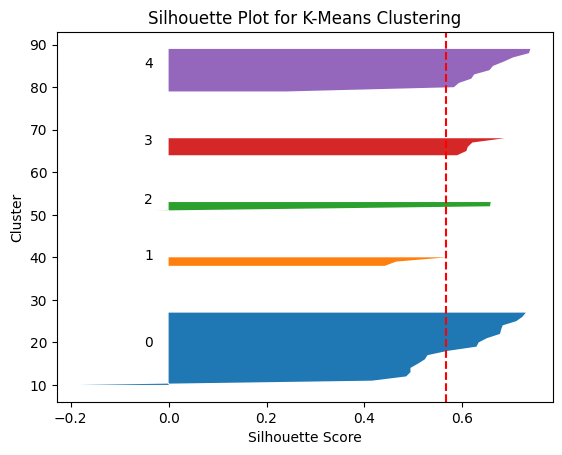

In [19]:
# 시각화 준비
y_lower = 10
for i in range(5): # 각 클러스터에 대해 반복
    ith_cluster_silhouette_values = silhouette_values[km_pred == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    # 클러스터별 막대 그리기
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # 클러스터 번호
    y_lower = y_upper + 10 # 다음 클러스터로 이동

# 그래프 설정
plt.axvline(x=silhouette_avg, color="red", linestyle="--") # 평균 실루엣 점수
plt.title("Silhouette Plot for K-Means Clustering")
plt.xlabel("Silhouette Score")
plt.ylabel("Cluster")
plt.show()

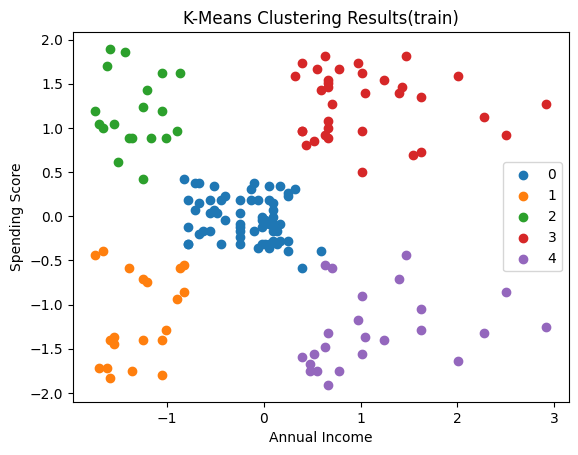

In [35]:
# 클러스터링 결과 시각화
# 학습 데이터 시각화
for i in sorted(fin_train['Cluster'].unique()):
    tmp = fin_train.loc[fin_train['Cluster'] == i] #해당하는 클러스터 번호일 때 그림을 그리고, for문 실행하며 위에 덧그림 
    plt.scatter(tmp[0], tmp[1])
    plt.legend(sorted(fin_train['Cluster'].unique()))
plt.title("K-Means Clustering Results(train)")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()


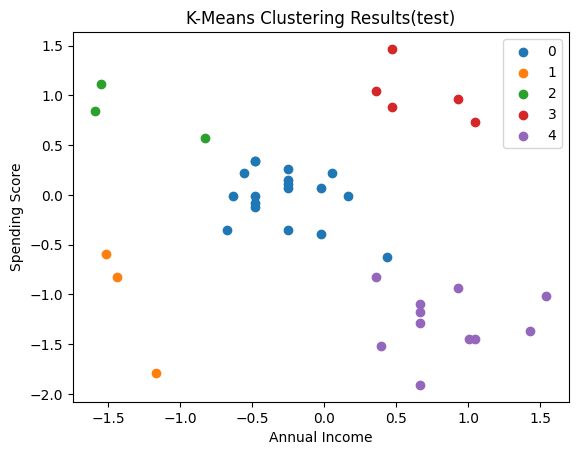

In [36]:
# 테스트 데이터 시각화
for i in sorted(fin_test['Cluster'].unique()):
    tmp = fin_test.loc[fin_test['Cluster'] == i] #해당하는 클러스터 번호일 때 그림을 그리고, for문 실행하며 위에 덧그림 
    plt.scatter(tmp[0], tmp[1])
    plt.legend(sorted(fin_test['Cluster'].unique()))
plt.title("K-Means Clustering Results(test)")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

In [37]:
# 0번 클러스터 : 소득과 소비 모두 전체 데이터 중 중앙에 분포함, 소득과 소비가 균형을 이루고 있음
# 1번 클러스터 : 소득과 소비 모두 전체 데이터 중 적은 군집, 소득과 소비가 균형을 이루고 있음
# 2번 클러스터 : 소득이 적지만 소비 점수는 높은 군집, 소득에 맞춰 소비를 줄일 필요가 있음
# 3번 클러스터 : 소득과 소비 모두 전체 데이터 중 많은 군집, 소득과 소비가 균형을 이루고 있음
# 4번 클러스터 : 소득이 많지만 소비 점수가 낮은 군집, 원활한 화폐의 회전을 위해 소비를 더 늘려도 괜찮아 보임